# UX-Анализ сайта
### Цели анализа: 
1. Проанализировать поведение пользователей за некоторый период: куда ходят, что смотрят, что делают, как долго / как глубоко смотрят, после чего уходят и другое.
2. Узкие или подозрительные места на сайте: к чему стоит присмотреться внимательнее (понаблюдать дальше), что пора поменять прямо сейчас (неудобно сделано) и др.
3. Идеи, какие данные сейчас не трекаются в GA, а следовало бы их трекать, потому что...

#### Период анализа: с 2 декабря 2020 года по 2 декабря 2021 года

=========================================================================================================================

## 1. Загрузка данных и импорт библиотек

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подгрузим сюда все excel-файлы, выкачанные из Google Analytics

In [2]:
# Таблица с пользователями
users = pd.read_excel('User_stats.xlsx', ['Users', 'Language', 'Age', 'Gender'])

# Таблица с устройствами и локацией
devices = pd.read_excel('Device_data.xlsx', ['DeviceType', 'Location'])

# Таблица с данными по поведению пользователей
behaviour = pd.read_excel('Behaviour.xlsx', ['Source', 'Depth', 'Duration', 'New_return', 'Pages', 'Active_users'])

=========================================================================================================================
## 2. Анализ пользователей

Для начала изучим нашу целевую аудиторию

In [3]:
users['Users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Идентификатор клиента       803 non-null    float64
 1   Сеансы                      803 non-null    int64  
 2   Сред. длительность сеанса   803 non-null    float64
 3   Показатель отказов          803 non-null    int64  
 4   Доход                       803 non-null    int64  
 5   Транзакции                  803 non-null    int64  
 6   Коэффициент конверсии цели  803 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 44.0 KB


В первом датафрейме у нас **803** уникальных пользователя. Заметим, что у нас нет пропущенных значений.
Теперь посмотрим, что у нас в самом датафрейме: выведем первые 5 строк

In [4]:
users['Users'].head()

,Идентификатор клиента,Сеансы,Сред. длительность сеанса,Показатель отказов,Доход,Транзакции,Коэффициент конверсии цели
0,1.198341e+09,41,155.878049,0,0,0,0.926829
1,3.397463e+08,22,280.000000,0,0,0,0.545455
2,1.764764e+09,20,106.300000,0,0,0,0.300000
3,5.091727e+08,11,0.545455,0,0,0,0.000000
4,2.067559e+09,8,0.750000,0,0,0,0.000000


При выгрузке с GA мы получаем уже сгруппированные датафреймы. В данном случае он сгруппирован по пользователю.
У нас есть столбцы с количеством сеансов, средняя длительность сеанса, показатель отказов, доход и транзакции.

Так же есть коэф-т конверсии цели, который в данный момент мы определить не можем и учитывать не будем.

Получим данные по основным стат показателям через describe()

In [5]:
users['Users'].describe()

,Идентификатор клиента,Сеансы,Сред. длительность сеанса,Показатель отказов,Доход,Транзакции,Коэффициент конверсии цели
count,8.030000e+02,803.000000,803.000000,803.000000,803.0,803.0,803.000000
mean,1.079216e+09,1.323786,46.170497,0.013699,0.0,0.0,0.156091
std,6.315912e+08,1.879080,180.566835,0.116309,0.0,0.0,0.460221
min,6.150793e+06,1.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5.065441e+08,1.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.095813e+09,1.000000,10.000000,0.000000,0.0,0.0,0.000000
75%,1.638227e+09,1.000000,11.000000,0.000000,0.0,0.0,0.000000
max,2.147305e+09,41.000000,2150.500000,1.000000,0.0,0.0,4.000000


**Ключевая статистика:**

1. **1.32** сеанса на пользователя
2. **46.17** секунд - средняя длительность сеанса
3. **1.3%** средний показатель отказов
4. У нас нет ни дохода, ни транзакций за этот период времени

**Важно:**
по текущим данным у нас есть отличие в средней продолжительности сеанса. В гугл аналитике мы видим **1 мин. 15 секунд**, в то время как в выгруженных данных по пользователям у нас **46.17 секунд**. Этот момент требует дальнейшего рассмотрения.

In [6]:
# Посчитаем долю пользователей, имевших более 1 сеанса
users['Users'][users['Users']['Сеансы'] > 1]['Идентификатор клиента'].count()/users['Users']['Идентификатор клиента'].count()

0.14196762141967623

Т.е. доля пользователей, имевших более 1 сеанса равна **14.2%**

**Гипотеза:**
Пользователи дальше начальной страницы (точки входа) не идут. Далее мы к этому вернемся, а пока продолжим изучать нашу ЦА

=========================================================================================================================
### Языковые группы

In [7]:
# Посмотрим на датафрейм language
users['Language'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Язык                                                  10 non-null     object 
 1   Пользователи                                          10 non-null     int64  
 2   Новые пользователи                                    10 non-null     int64  
 3   Сеансы                                                10 non-null     int64  
 4   Показатель отказов                                    10 non-null     float64
 5   Страниц/сеанс                                         10 non-null     float64
 6   Сред. длительность сеанса                             10 non-null     float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  10 non-null     float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     10 non-nu

В датафрейме у нас **10** уникальных языковых групп и нет пропущенных значений.

In [8]:
users['Language']

,Язык,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,ru-ru,218,217,376,0.002660,3.686170,148.039894,0.018617,7,0
1,en-us,201,201,231,0.000000,2.103896,20.991342,0.000000,0,0
2,en-gb,96,96,109,0.000000,2.403670,29.541284,0.018349,2,0
3,zh-cn,85,85,90,0.111111,1.888889,0.511111,0.000000,0,0
4,ru,64,64,96,0.000000,3.177083,137.583333,0.052083,5,0
5,de,9,9,11,0.000000,2.000000,9.909091,0.000000,0,0
6,fr-fr,9,9,10,0.000000,2.000000,10.100000,0.000000,0,0
7,it-it,9,9,10,0.000000,2.000000,9.900000,0.000000,0,0
8,fr,8,8,8,0.000000,2.000000,9.875000,0.000000,0,0
9,de-de,7,7,8,0.000000,2.000000,10.500000,0.000000,0,0


In [9]:
# Посчитаем количество пользователей
users['Language']['Пользователи'].sum()

706

Данные:

1) Пользователей всего **706** из **803** - значит не у всех пользователей система определила язык.
 
2) Столбцы "Пользователи" и "Новые пользователи" практически ничем не отличаются (разница в одного пользователя в одной строке)

3) Построим столбчатые диаграммы по Пользователям, Сеансам, Страниц/сеанс и Сред. длительность сеанса.

**Важно:** Будем рассматривать только топ пять групп, так как остальные 5 занимают незначительную долю в целом.


Text(0.5, 1.0, 'Сеансы')

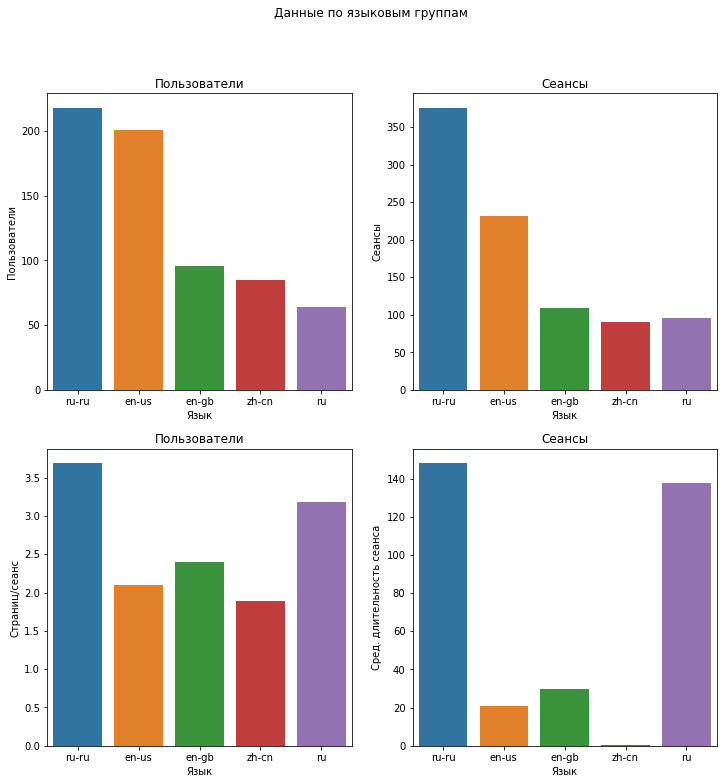

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Данные по языковым группам')

sns.barplot(ax = axes[0, 0], x = 'Язык', y = 'Пользователи', data = users['Language'].head(5))
axes[0, 0].set_title('Пользователи')

sns.barplot(ax = axes[0, 1], x = 'Язык', y = 'Сеансы', data = users['Language'].head(5))
axes[0, 1].set_title('Сеансы')

sns.barplot(ax = axes[1, 0], x = 'Язык', y = 'Страниц/сеанс', data = users['Language'].head(5))
axes[1, 0].set_title('Пользователи')

sns.barplot(ax = axes[1, 1], x = 'Язык', y = 'Сред. длительность сеанса', data = users['Language'].head(5))
axes[1, 1].set_title('Сеансы')

In [11]:
# Доля пользователей с русским языком
rus = users['Language'][(users['Language']['Язык'] == 'ru-ru') | (users['Language']['Язык'] == 'ru')]['Пользователи'].sum()/803
# Доля пользователей с английским языком
eng = users['Language'][(users['Language']['Язык'] == 'en-us') | (users['Language']['Язык'] == 'en-gb')]['Пользователи'].sum()/803

print('{:.1%} - доля пользователей с русским языком \n{:.1%} - доля пользователей с английским языком'.format(rus, eng))


35.1% - доля пользователей с русским языком 
37.0% - доля пользователей с английским языком


**Выводы:**

1) Как показывают рассчеты, английский язык занимает у нас большую долю от пользователей

2) Доля русского языка на **1.9%** меньше.

3) Так как у нас из **803** пользователей язык не определен для **97**. То окночательную пропорцию мы не знаем. Будем считать доли равными.

4) Последний язык - это китайский. Скорее всего пользователи попали по ошибке.



### Рекомендации

Сделать 2 языка на сайте и возможность переключаться на нужный язык (русский или английский)

=========================================================================================================================
### Возрастные группы

In [12]:
users['Age'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Возраст                                               4 non-null      object 
 1   Пользователи                                          4 non-null      int64  
 2   Новые пользователи                                    4 non-null      int64  
 3   Сеансы                                                4 non-null      int64  
 4   Показатель отказов                                    4 non-null      int64  
 5   Страниц/сеанс                                         4 non-null      float64
 6   Сред. длительность сеанса                             4 non-null      float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  4 non-null      float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     4 non-null

В датафрейме у нас **4** возрастные группы и отсутвуют пропущенные значения.

In [13]:
users['Age']

,Возраст,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,25-34,39,37,70,0,3.971429,229.671429,0.042857,3,0
1,18-24,27,25,43,0,3.720930,256.395349,0.000000,0,0
2,35-44,18,15,54,0,2.518519,75.574074,0.018519,1,0
3,45-54,14,14,18,0,3.444444,36.444444,0.055556,1,0


In [14]:
print('Доля пользователей, попавших в возрастную группу от всего числа пользователей {:.1%}'.format(users['Age']['Пользователи'].sum()/803))

Доля пользователей, попавших в возрастную группу от всего числа пользователей 12.2%


**Выводы:**

В возрастные группы у нас попало только **12.2%** пользователей от общего числа. Сейчас мы не можем однозначно выделить нашу целевую аудиторию по возрасту. Стоит предприянять шаги для отслеживания возраста, чтобы определить ЦА по возрасту.

=========================================================================================================================
### Гендерные группы

In [15]:
users['Gender'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Пол                                                   2 non-null      object 
 1   Пользователи                                          2 non-null      int64  
 2   Новые пользователи                                    2 non-null      int64  
 3   Сеансы                                                2 non-null      int64  
 4   Показатель отказов                                    2 non-null      int64  
 5   Страниц/сеанс                                         2 non-null      float64
 6   Сред. длительность сеанса                             2 non-null      float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  2 non-null      float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     2 non-null

В датафрейме у нас **2** группы и отсутвуют пропущенные значения.

In [16]:
users['Gender']

,Пол,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,female,56,54,95,0,3.494737,114.778947,0.021053,2,0
1,male,54,53,113,0,3.433628,222.955752,0.035398,4,0


In [17]:
print('Доля пользователей, попавших в гендерную группу от всего числа пользователей {:.1%}'.format(users['Gender']['Пользователи'].sum()/803))

Доля пользователей, попавших в гендерную группу от всего числа пользователей 13.7%


**Выводы:**

Здесь мы тоже не можем однозначно сказать какое распределение по полу у нашей ЦА.
Но поскольку контент сайта не предполагает какую-то гендерную тематику, мы эти данные использовать не будем

###  Рекомендации

Необходимо отслеживать пол и возраст на каждой странице сайта, чтобы четко определить ЦА по каждому направлению деятельности.
Такой подход поможет в будущем четче сформулировать предложения по ЦА с целью максимальной заинтересованности у конкретных пользователей

=========================================================================================================================

Теперь рассмотрим данные из таблицы по устройствам пользователей

###  Тип устройства

In [18]:
devices['DeviceType'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Тип устройства                                        3 non-null      object 
 1   Пользователи                                          3 non-null      int64  
 2   Новые пользователи                                    3 non-null      int64  
 3   Сеансы                                                3 non-null      int64  
 4   Показатель отказов                                    3 non-null      float64
 5   Страниц/сеанс                                         3 non-null      float64
 6   Сред. длительность сеанса                             3 non-null      float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  3 non-null      float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     3 non-null

В датафрейме у нас **3** типа устройства.
У нас нет пропущенных значений. Теперь посчитаем количество пользователей

In [19]:
devices['DeviceType']['Пользователи'].sum()

803

Как видим из количества пользователей: все 803 пользователя определены в категорию по типу устройства

In [20]:
devices['DeviceType']

,Тип устройства,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,desktop,427,425,628,0.001592,2.861465,110.391720,0.017516,11,0
1,mobile,359,360,414,0.024155,2.657005,22.635266,0.007246,3,0
2,tablet,17,17,21,0.000000,2.380952,84.904762,0.000000,0,0


По типам устройств у нас все пользователи определены. Построим диаграммы, чтобы оценить распределение

Text(0.5, 1.0, 'Сред. длительность сеанса по типу устройства')

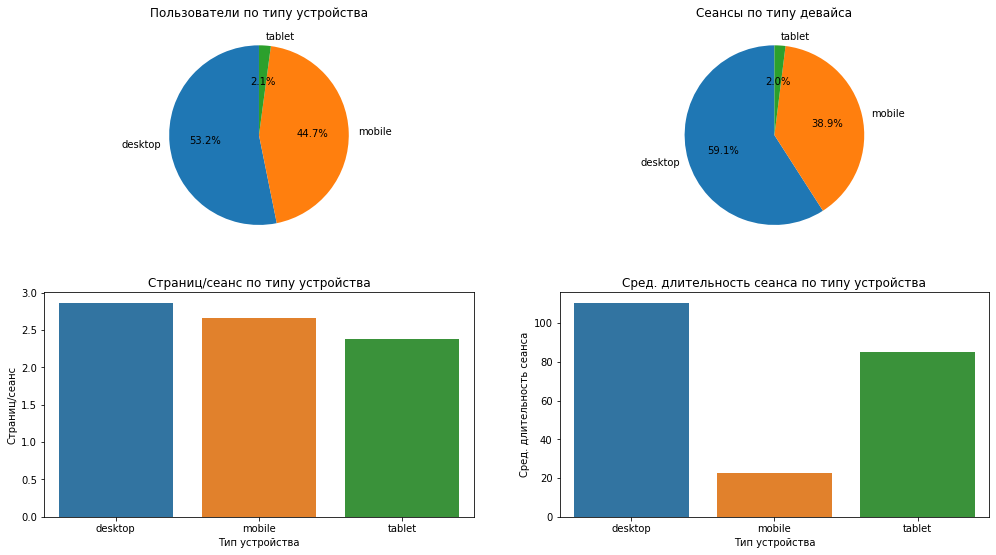

In [21]:
labels = 'desktop', 'mobile', 'tablet'
sizes1 = [devices['DeviceType']['Пользователи'].iloc[0], devices['DeviceType']['Пользователи'].iloc[1], devices['DeviceType']['Пользователи'].iloc[2]]
sizes2 = [devices['DeviceType']['Сеансы'].iloc[0], devices['DeviceType']['Сеансы'].iloc[1], devices['DeviceType']['Сеансы'].iloc[2]]
sizes3 = [devices['DeviceType']['Страниц/сеанс'].iloc[0], devices['DeviceType']['Страниц/сеанс'].iloc[1], devices['DeviceType']['Страниц/сеанс'].iloc[2]]
sizes4 = [devices['DeviceType']['Сред. длительность сеанса'].iloc[0], devices['DeviceType']['Сред. длительность сеанса'].iloc[1], devices['DeviceType']['Сред. длительность сеанса'].iloc[2]]

fig, axes = plt.subplots(2, 2, figsize=(7,7))
plt.subplots_adjust(bottom = -0.1, right = 2)

axes[0, 0].set_title('Пользователи по типу устройства')
axes[0, 0].pie(sizes1, labels = labels, autopct='%.1f%%',
       shadow=False, startangle=90)
axes[0, 1].set_title('Сеансы по типу девайса')
axes[0, 1].pie(sizes2, labels = labels, autopct='%.1f%%',
        shadow=False, startangle=90)

sns.barplot(ax = axes[1, 0], x = 'Тип устройства', y = 'Страниц/сеанс', data = devices['DeviceType'].head(5))
axes[1, 0].set_title('Страниц/сеанс по типу устройства')

sns.barplot(ax = axes[1, 1], x = 'Тип устройства', y = 'Сред. длительность сеанса', data = devices['DeviceType'].head(5))
axes[1, 1].set_title('Сред. длительность сеанса по типу устройства')

**Выводы:**

1. **53.2%** пользователей используют компьютер, **44.7%** используют телефон и **2.1%** используют планшет

2. Количество сеансов по типу устройства: **59.1%** компьютер, **38.9%** телефон и **2%** планшет

3. По параметру Страниц/сеанс у нас равное распределение

4. Средняя длительность сеансов пользователей телефонов гораздо ниже пользователей других устройств. Это узкое место сайта учитывая, что **44%** пользователей сайта заходят с телефона


=========================================================================================================================
### Данные по локации

In [22]:
devices['Location'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Страна                                                89 non-null     object 
 1   Пользователи                                          89 non-null     int64  
 2   Новые пользователи                                    89 non-null     int64  
 3   Сеансы                                                89 non-null     int64  
 4   Показатель отказов                                    89 non-null     float64
 5   Страниц/сеанс                                         89 non-null     float64
 6   Сред. длительность сеанса                             89 non-null     float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  89 non-null     float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     89 non-n

В датафрейме 89 уникальных стран и нет пропущенных значений

In [23]:
devices['Location']

,Страна,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,Russia,272,271,442,0.000000,3.660633,141.219457,0.027149,12,0
1,China,101,101,109,0.091743,1.908257,1.908257,0.000000,0,0
2,United States,49,49,54,0.000000,2.074074,10.240741,0.000000,0,0
3,Ukraine,34,34,59,0.000000,2.406780,95.694915,0.000000,0,0
4,India,23,23,27,0.000000,2.074074,10.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
84,Serbia,1,1,1,0.000000,2.000000,10.000000,0.000000,0,0
85,Slovakia,1,1,1,0.000000,2.000000,10.000000,0.000000,0,0
86,Syria,1,1,1,0.000000,2.000000,10.000000,0.000000,0,0
87,Tajikistan,1,1,1,0.000000,2.000000,10.000000,0.000000,0,0


**Выводы:**

Поскольку на територрии России и многих других стран используется VPN, данные по местоположению могут быть некорректными.
Поэтому для нас практической пользы информация по локации не несет

###  Рекомендации

Нужна оптимизациия сайта для телефона для увеличения средней длительности сеанса.

=========================================================================================================================
## 3. Анализ поведения пользователей

In [24]:
# Таблица с данными по поведению пользователей
behaviour = pd.read_excel('Behaviour.xlsx', ['Source', 'Depth', 'Duration', 'New_return', 'Pages', 'Active_users'])

Рассмотрим теперь таблицу с поведением пользователей

Мы имеем следующие датафреймы:

"Source" - источники трафика

"Depth" - глубина просмотра сайта

"Duration" - данные по длительности сеанса

"New_return" - данные по новым пользователям и вернувшимся

"Periods" - группированные данные по сеансам

"Pages" - данные по посещению страниц

"Active_users" - активные пользователи по дням 

=========================================================================================================================
### Данные по активным пользователям

In [25]:
behaviour['Active_users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Индекс дня                        366 non-null    datetime64[ns]
 1   Активных пользователей за 1 день  366 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


У нас нет пропусков в данных. Всего 366 значений. Переименуем столбцы для простоты обработки

In [26]:
behaviour['Active_users'] = behaviour['Active_users'].rename(columns = {'Индекс дня' : 'День', 'Активных пользователей за 1 день': 'Пользователи'})

In [27]:
behaviour['Active_users'].head()

,День,Пользователи
0,2020-12-02,2
1,2020-12-03,1
2,2020-12-04,4
3,2020-12-05,1
4,2020-12-06,3


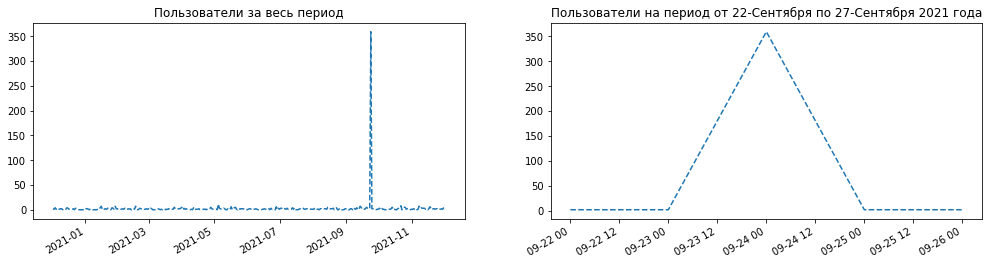

In [28]:
#Постороим график активных пользователей по дате
fig, axes = plt.subplots(1, 2, figsize=(17,4))
fig.autofmt_xdate()

axes[0].set_title('Пользователи за весь период')
axes[0].plot(behaviour['Active_users']['День'], behaviour['Active_users']['Пользователи'], linestyle='--')
axes[1].set_title('Пользователи на период от 22-Сентября по 27-Сентября 2021 года')
axes[1].plot(behaviour['Active_users'][(behaviour['Active_users']['День'] > '2021-09-21') & (behaviour['Active_users']['День'] < '2021-09-27')]['День'],
             behaviour['Active_users'][(behaviour['Active_users']['День'] > '2021-09-21') & (behaviour['Active_users']['День'] < '2021-09-27')]['Пользователи'], linestyle='--')

#### Выводы

Как видно на первом графике мы имеем гигантский скачок в активных пользователях в конце сентября. Второй (увеличенный) график показывает резкий скачок активных пользователей (350 - 370 пользователей) на период с 23 сентября по 25 сенятбря. Это очень странная аномалия, скорее всего мы увидим источник этой аномалии в данных по каналам и источникам. Проанализируем датафрейм по источникам

=========================================================================================================================
### Данные по источникам трафика

In [29]:
behaviour['Source'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Источник или канал                                    10 non-null     object 
 1   Пользователи                                          10 non-null     int64  
 2   Новые пользователи                                    10 non-null     int64  
 3   Сеансы                                                10 non-null     int64  
 4   Показатель отказов                                    10 non-null     float64
 5   Страниц/сеанс                                         10 non-null     float64
 6   Сред. длительность сеанса                             10 non-null     float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  10 non-null     float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     10 non-nu

У нас нет пропусков в данных - можем продолжать анализ

In [ ]:
behaviour['Source']

#### Выводы
На первом месте по пользоваталям у нас идет "trafficgroup.xyz". Поиск информации в интернете показывает, что это спам-бот.
Ключевые моменты спам-бота:

1) Первое, что вам нужно помнить, это НЕ ПОСЕЩАТЬ ^^^.xyz! 

2) Часть спама исходит от ботов, фактически посещающих ваш сайт и выполняющих скрипт Google Analytics, в то время как другой - это призрачный трафик, который обходит ваш сервер и нацелен непосредственно на GA. В отличие от спама ботов, призрачный трафик появляется только в Google Analytics.

3) такой трафик загрязняет ваши отчеты Google Analytics и может искажать ваши данные, иногда до такой степени, что они становятся непригодными для использования. Это особенно верно для сайтов, которые ежедневно получают небольшой или средний объем трафика. Если вы полагаетесь на данные Google Analytics для принятия бизнес-решений, то наличие максимально чистых данных должно быть главным приоритетом.

4) Рекомендуемый способ - настроить фильтры просмотра в Google Analytics - включить фильтр для допустимых имен хостов и исключить фильтр для измерения источника кампании, отфильтровав "^^^.xyz". Это самое простое и масштабируемое решение (масштабируемое в определенной степени).

#### Рекоммендации
Отфильтровать *.xyz источник в Гугл аналитике

Уберем первый источник из анализа и посмотрим, что у нас будет в этом случае с данными по источникам

In [ ]:
behaviour['Source'] = behaviour['Source'][behaviour['Source']['Источник или канал'] != 'trafficgroup.xyz / referral']
behaviour['Source']

Наиболее популярным источником является директ переход, далее идут уже поисковики гугл, байду и яндекс. Соцсети приносят совсем мало трафика. Посчитаем средние по показателям "Страниц/сеанс" и "Средняя длительность сеанса" БЕЗ учета спам-бота.

In [ ]:
# Среднее количество сеансов на пользвателя 
avg_su = behaviour['Source']['Сеансы'].sum()/behaviour['Source']['Пользователи'].sum()

# Среднее по сеансам 
avg_s = behaviour['Source']['Страниц/сеанс'].mean()

# Среднее по длительности сеансам
avg_d = behaviour['Source']['Сред. длительность сеанса'].mean()

print(round(avg_su,2), round(avg_s,2), round(avg_d,2))

Среднее количество сеансов **1.42** на пользователя, **3.42**  - среднее количество страниц на сеанс.
Средняя продолжительность сеанса у нас выросла с **46.17** секунд до **84**, за счет того, что мы отфильтровали спам-бота искажающего наши данные

##### Важно:
Несмотря на то, что мы убрали спам-бота, у нас все равно по-прежнему низкое количество сеансов на пользователя.

=========================================================================================================================
### Данные по посещению страниц

In [ ]:
behaviour ['Pages'].info()

В датафрейме **21** уникальное значение без пропусков

In [ ]:
behaviour ['Pages']

**Индексы  8 - 20**
Являются домашней страницей. Выведем датафрейм без них для удобства анализа

In [ ]:
behaviour ['Pages'].head(8)

##  Статистика по страницам показывает следующие данные:

**1) Индекс 0 - Домашняя страница "/index.html":**
Ожидаемо имеет высокое количество просмотра страниц, но имеет самый высокий процент выходов, и это единственная страница, у которой показатель отказов больше нуля (1.54%). Так же она имеет среднюю длительность просмотра 7 секунд, что подтверждает высокий процент выходов

**Гипотезы:**
1. Важно помнить, что больше 40% пользователей попадают на страницу с телефона и сайт должен быть оптимизирован под телефон. Проверка с телефона показывает, что из трех кнопок с переходом на разный контент сайта на телефоне показывает только 1 кнопку. Это узкое место в сайте. 

2. Пользователи уходят со страницы, потому что не понимают, что им делать дальше и как взаимодействовать с сайтом (отсутствует абзац с описанием пользы для читающего, инструкции, что делать дальше)

**Рекомендации:**
1. Стоит оптимизировать главную страницу под мобильные устройства
2. Стоит добавить абзац с описанием полезности контента сайта

**2) Индекс 1/3 -Авторский курс:**
На страницу с авторским курсом можно попасть с двух источников на стайте: с bmstu и ux. Но как видно в таблице количество просмотров страницы с курсом выше, чем источники откуда на нее можно перейти. Это значит, что на эту страницу попадают извне, а не с сайта. Возможно, ссылка на курс есть в соцсетях или на сайте вуза. По странице с авторским курсом мы можем наблюдать высокий процент выходов. Стоит подумать над оптимизацией контента. 

**Рекомендации:**
1.  Стоит вынести ссылку на авторский курс на главную страницу для повышения просмотров курса, снижения количества выходов с главной и увеличения средней длительности просмотра главной страницы

2. Оптимизировать страницу с авторским курсом для удержания внимания пользователя - например, убрать опцию показать слайды и оставить страницу, чтобы слайды были доступны как если бы пользователь нажал на кнопку показать слайды

3. Так же нет возможности открыть слайды на полный экран - неудобно смотреть мелкий текст

**3) Индекс 5 - /ux/uxr-tool-concept.html:**
Не совсем очевидно положение этой страницы. Теряется в коллаже: неочевидна кликабельность картинок, что возвращает нас к гипотезе, что пользователи не понимают как использовать сайт.

**4) Индекс 6 - /yoga/index.html:**
По йоге очень слабое количество просмотров.

**5) Индекс 7 - /bmstu/ir_tasks.html**
Несмотря на то, что на странице с btstu количество просмотров равно 198. IR task просмотры всего 8.
Стоит подумать как увеличить количество просмотров - например сделать переход из панели быстрого доступа (вверху) сразу на эту страницу

=========================================================================================================================
### Данные по длительности сеанса

In [ ]:
behaviour['Duration'].info()

Пропусков в данных нет

In [ ]:
behaviour['Duration']

**Выводы:**
Как видно по таблице на большое количество просмотров страниц идет меньше 10 секунд.
Это связано с большим количеством выхода с главной и со спам-ботом

=========================================================================================================================
### Данные по глубине просмотра

In [ ]:
behaviour['Depth'].info()

Пропусков в данных нет

In [ ]:
behaviour['Depth']

**Выводы:**
Больше ~80% всех сеансов имеют глубину просмотра 2. 

**Гипотеза:**
Сайт имеет низкое юзабилити, что приводит к снижению глубины просмотра. Стоит оптимизировать пользовательский интерфейс особенно для мобильной версии

=========================================================================================================================
### Данные по новым и вернувшимся пользователям

In [ ]:
behaviour['New_return']

**Выводы:**
Из 801 пользователя только 114 вернулось.

**Гипотеза:**
Для тех кто понял как найти нужную информацию увеличивается средняя продолжительность сеанса

# Отчет

### Статистика в числах по рассматриваемому периоду:
1. **803** - уникальных пользователя

2. **1.42** - сеанса на пользователя (без искажения вызванное спам-бота)

3. **84** секунды - средняя длительность сеанса (без искажения вызванное спам-бота)

4. **1.3%** - средний показатель отказов

5. **14.2%** - доля пользователей имевших более 1 сеанса

6. **53.2%** пользователей используют компьютер, **44.7%** используют телефон и **2.1%** используют планшет

7. **80%** всех сеансов имеют глубину просмотра **2**. 




### Рекоммендации по узким местам на сайте:

1. Сделать 2 языка на сайте и возможность переключаться на нужный язык (русский или английский)

2. Необходимо отслеживать пол и возраст на каждой странице сайта, чтобы четко определить ЦА по каждому направлению деятельности. 

3. Нужна оптимизациия сайта для телефона для увеличения средней длительности сеанса.

4. Стоит добавить абзац с описанием полезности контента сайта на главной странице (объяснить навигацию по сайту)

5.  Стоит вынести ссылку на авторский курс на главную страницу для повышения просмотров курса, снижения количества выходов с главной и увеличения средней длительности просмотра главной страницы

6. Оптимизировать страницу с авторским курсом для удержания внимания пользователя - например, убрать опцию показать слайды и оставить страницу, чтобы слайды были доступны как если бы пользователь нажал на кнопку показать слайды

7. Так же нет возможности открыть слайды на полный экран - неудобно смотреть мелкий текст

### Идеи для Гугл Аналитики

1. Отфильтровать *.xyz источник для очистки данных от искажений

2. Нужно отслеживать пол и возраст для всех страниц сайта 